In [11]:
import scipy as sp
import scipy.stats
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns

### 가변길이 인코딩

In [6]:
sp.stats.entropy([1/2, 1/4, 1/8, 1/16,1/64,1/64,1/64,1/64], base=2)

2.0

### 조건부엔트로피를 사용한 붓꽃 분류문제

In [7]:
from sklearn.datasets import load_iris

iris = load_iris()
idx = np.in1d(iris.target, [1, 2])
X = iris.data[idx, :]
y = iris.target[idx]
df = pd.DataFrame(X, columns=iris.feature_names)
df["species"] = iris.target[idx]
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
95,6.7,3.0,5.2,2.3,2
96,6.3,2.5,5.0,1.9,2
97,6.5,3.0,5.2,2.0,2
98,6.2,3.4,5.4,2.3,2
99,5.9,3.0,5.1,1.8,2


C:\Users\shs40\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44867 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\shs40\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48155 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\shs40\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 52840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\shs40\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\shs40\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44600 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\shs40\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51060 missing from c

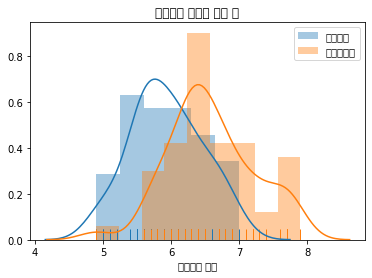

In [12]:
sns.distplot(df[df.species == 1]["sepal length (cm)"], hist=True, rug=True, label="버지니카")
sns.distplot(df[df.species == 2]["sepal length (cm)"], hist=True, rug=True, label="베르시칼라")
plt.legend()
plt.xlabel("꽃받침의 길이")
plt.title("꽃받침의 길이와 붓꽃 종")
plt.show()

In [13]:
# 꽃받침의 길이 6cm를 기준으로 하여 분류
df["X1"] = df["sepal length (cm)"] > 6
pivot_table1 = df.groupby(["X1", "species"]).size().unstack().fillna(0)
pivot_table1

species,1,2
X1,,
False,30,9
True,20,41


In [18]:
# 위 경우의 조건부 엔트로피
def cond_entropy(v):
    pYX0 = v[0, :] / np.sum(v[0, :])
    pYX1 = v[1, :] / np.sum(v[1, :])
    HYX0 = sp.stats.entropy(pYX0, base=2)
    HYX1 = sp.stats.entropy(pYX1, base=2)
    HYX = np.sum(v, axis=1) @ [HYX0, HYX1] / np.sum(v)
    return HYX

cond_entropy(pivot_table1.values)

0.860714271586387

In [19]:
# 6.5cm를 기준으로 하여 분류
df["X2"] = df["sepal length (cm)"] > 6.5
pivot_table2 = df.groupby(["X2", "species"]).size().unstack()
pivot_table2

species,1,2
X2,,
False,42,28
True,8,22


In [20]:
# 이때 조건부 엔트로피
cond_entropy(pivot_table2.values)

0.9306576387006182

In [21]:
# 6.5보다 6이 더 좋은 기준

In [ ]:
# 6.5cm를 기준으로 하여 분류
df["X2"] = df["sepal length (cm)"] > 6.5
pivot_table2 = df.groupby(["X2", "species"]).size().unstack()
pivot_table2

#### 연습문제10.2.1

In [27]:
from sklearn.datasets import load_iris
iris = load_iris() 
X = iris.data 
y = iris.target 
df = pd.DataFrame(X, columns=iris.feature_names) 
df["species"] = iris.target

In [32]:
def calc_cond_entropies(col, threshold):    
    df["X1"] = df[col] > threshold    
    pivot_table1 = df.groupby(["X1", "species"]).size().unstack().fillna(0)    
    v = pivot_table1.values    
    pYX0 = v[0, :] / np.sum(v[0, :])    
    pYX1 = v[1, :] / np.sum(v[1, :])    
    HYX0 = sp.stats.entropy(pYX0, base=2)    
    HYX1 = sp.stats.entropy(pYX1, base=2)
    HYX = np.sum(v, axis=1) @ [HYX0, HYX1] / np.sum(v)    
    return HYX


C:\Users\shs40\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\shs40\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\shs40\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44050 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\shs40\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\shs40\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46384 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\shs40\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47480 missing from c

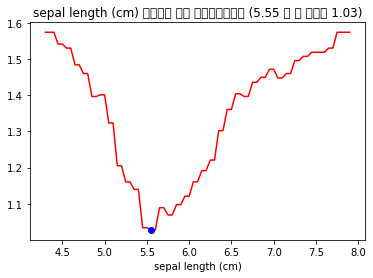

In [33]:
def plot_min_cond_entropy(col):    
    th_min = df[col].min()    
    th_max = df[col].max()    
    th_range = np.arange(th_min, th_max + 0.05, 0.05)
    cond_entropies = []    
    for th in th_range:        
        cond_entropies.append(            
            calc_cond_entropies(col, th))
        
    id_min = np.argmin(cond_entropies)    
    th_min = th_range[id_min]    
    ce_min = np.min(cond_entropies)    
    plt.plot(th_range, cond_entropies, "r-")    
    plt.plot(th_min, ce_min, "bo")    
    title = "{} 기준값에 따른 조건부엔트로피 ({:.3} 일 때 최소값 {:.3})".format(col, th_min, ce_min)    
    plt.title(title)    
    plt.xlabel(col)    
    plt.show()
    
plot_min_cond_entropy("sepal length (cm)")

### 교차엔트로피

```
p=[1/4,1/4,1/4,1/4]
q=[1/2,1/4,1/8,1/8]
```

In [34]:
- 1/4 * np.log2(1/2) - 1/4 * np.log2(1/4) - 1/4 * np.log2(1/8) - 1/4 * np.log2(1/8) 

2.25

### 교차 엔트로피를 사용한 분류성능 추정

In [37]:
from sklearn.datasets import load_iris

iris = load_iris()
idx = np.in1d(iris.target, [0, 1])
X = iris.data[idx, :]
y = iris.target[idx]
df = pd.DataFrame(X, columns=iris.feature_names)
df["y"] = iris.target[idx]
df["y_hat"] = (df["sepal length (cm)"] > 5.4).astype(int)
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y,y_hat
95,5.7,3.0,4.2,1.2,1,1
96,5.7,2.9,4.2,1.3,1,1
97,6.2,2.9,4.3,1.3,1,1
98,5.1,2.5,3.0,1.1,1,0
99,5.7,2.8,4.1,1.3,1,1


In [38]:
# 로그 손실값
from sklearn.metrics import log_loss

log_loss(df["y"], df["y_hat"])

3.799305383311686

### 가변길이 인코딩과 쿨백-라이블러 발산

In [39]:
# entropy에 두개의 확률변수를 넣어주면 쿨백-라이블러발산을 계산해줌
sp.stats.entropy([1/2, 1/4, 1/8, 1/8], [1/4, 1/4, 1/4, 1/4], base=2)

0.24999999999999997

### 이산확률변수의 상호정보량

C:\Users\shs40\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if sys.path[0] == '':
C:\Users\shs40\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45684 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\shs40\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\shs40\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44536 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\shs40\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: R

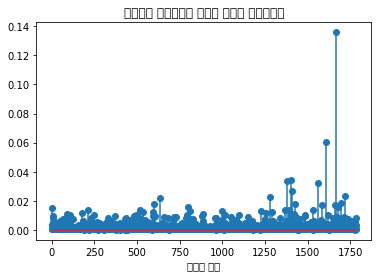

In [40]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import mutual_info_score

categories = ['rec.autos', 'sci.med', 'rec.sport.baseball']
newsgroups = fetch_20newsgroups(subset='train', categories=categories)
vect = CountVectorizer(stop_words="english", token_pattern="[a-zA-Z]+")
X = vect.fit_transform(newsgroups.data).toarray()
y = newsgroups.target

mi = np.array([mutual_info_score(X[:, i], y) for i in range(X.shape[0])])
plt.stem(mi)
plt.title("뉴스그룹 카테고리와 키워드 사이의 상호정보량")
plt.xlabel("키워드 번호")
plt.show()

In [41]:
# 가장 상호정보량이 큰 10개
inv_vocabulary = {v: k for k, v in vect.vocabulary_.items()}
idx = np.flip(np.argsort(mi))
[inv_vocabulary[idx[i]] for i in range(10)]

['baseball',
 'banks',
 'automotive',
 'auto',
 'ball',
 'autos',
 'batting',
 'atlanta',
 'alomar',
 'bat']

### 최대정보 상관계수

C:\Users\shs40\anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead


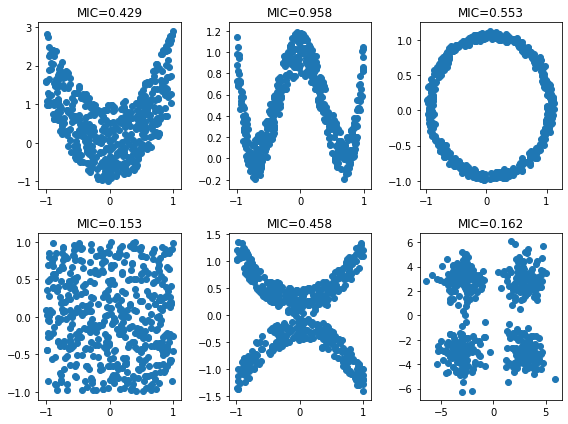

In [43]:
from minepy import MINE

mine = MINE()

n = 500

plt.figure(figsize=(8, 6))

plt.subplot(231)
x1 = np.random.uniform(-1, 1, n)
y1 = 2*x1**2 + np.random.uniform(-1, 1, n)
plt.scatter(x1, y1)
mine.compute_score(x1, y1)
plt.title("MIC={0:0.3f}".format(mine.mic()))

plt.subplot(232)
x2 = np.random.uniform(-1, 1, n)
y2 = 4*(x2**2-0.5)**2 + np.random.uniform(-1, 1, n)/5
plt.scatter(x2, y2)
mine.compute_score(x2, y2)
plt.title("MIC={0:0.3f}".format(mine.mic()))

plt.subplot(233)
x3 = np.random.uniform(-1, 1, n)
y3 = np.cos(x3 * np.pi) + np.random.uniform(0, 1/8, n)
x3 = np.sin(x3 * np.pi) + np.random.uniform(0, 1/8, n)
plt.scatter(x3, y3)
mine.compute_score(x3, y3)
plt.title("MIC={0:0.3f}".format(mine.mic()))

plt.subplot(234)
x4 = np.random.uniform(-1, 1, n)
y4 = np.random.uniform(-1, 1, n)
plt.scatter(x4, y4)
mine.compute_score(x4, y4)
plt.title("MIC={0:0.3f}".format(mine.mic()))

plt.subplot(235)
x5 = np.random.uniform(-1, 1, n)
y5 = (x5**2 + np.random.uniform(0, 0.5, n)) * np.array([-1, 1])[np.random.random_integers(0, 1, size=n)]
plt.scatter(x5, y5)
mine.compute_score(x5, y5)
plt.title("MIC={0:0.3f}".format(mine.mic()))

plt.subplot(236)
xy1 = np.random.multivariate_normal([3, 3], [[1, 0], [0, 1]], int(n/4))
xy2 = np.random.multivariate_normal([-3, 3], [[1, 0], [0, 1]], int(n/4))
xy3 = np.random.multivariate_normal([-3, -3], [[1, 0], [0, 1]], int(n/4))
xy4 = np.random.multivariate_normal([3, -3], [[1, 0], [0, 1]], int(n/4))
xy = np.concatenate((xy1, xy2, xy3, xy4), axis=0)
x6 = xy[:, 0]
y6 = xy[:, 1]
plt.scatter(x6, y6)
mine.compute_score(x6, y6)
plt.title("MIC={0:0.3f}".format(mine.mic()))

plt.tight_layout()
plt.show()

In [44]:
# 위 분포들은 상관계수를 구했을시 
# 위처럼 비선형이지만 관계가 있는경우 상관계수가 낮게 나옴
# MIC를 이용하면 구할 수 있음